In [1]:
###9.2.8

from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_button_task()
# Contrast map of motor task
localizer_tmap_filename = localizer_dataset.tmap
# Subject specific anatomical image
localizer_anat_filename = localizer_dataset.anat


Dataset created in /home/pierre/nilearn_data/brainomics_localizer



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/func.py:764: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


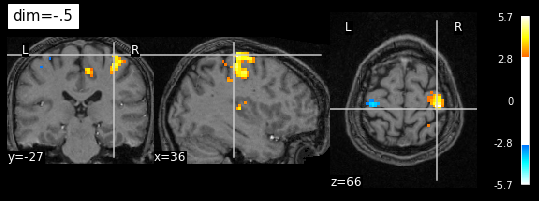

In [2]:
## contrôle du contraste avec le fond
from nilearn import plotting
plotting.plot_stat_map(localizer_tmap_filename,
                       bg_img=localizer_anat_filename,
                       cut_coords=(36, -27, 66),
                       threshold=3, title="dim=-.5",
                       dim=-.5)

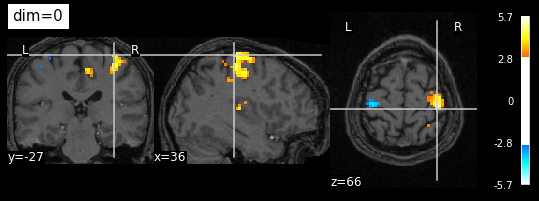

In [3]:
## Le fond s'obscurcit
plotting.plot_stat_map(localizer_tmap_filename,
                       bg_img=localizer_anat_filename,
                       cut_coords=(36, -27, 66),
                       threshold=3, title="dim=0",
                       dim=0)



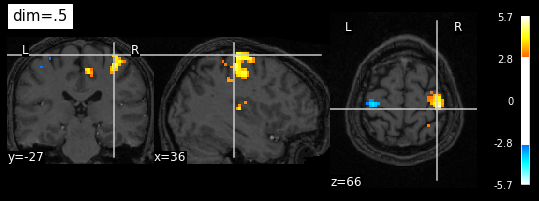

In [4]:
plotting.plot_stat_map(localizer_tmap_filename,
                       bg_img=localizer_anat_filename,
                       cut_coords=(36, -27, 66),
                       threshold=3, title="dim=.5",
                       dim=.5)

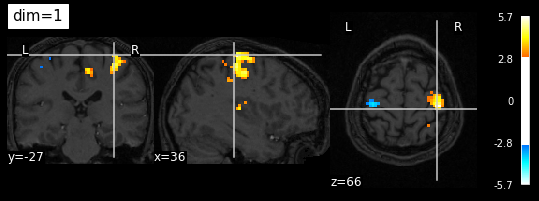

In [5]:
plotting.plot_stat_map(localizer_tmap_filename,
                       bg_img=localizer_anat_filename,
                       cut_coords=(36, -27, 66),
                       threshold=3, title="dim=1",
                       dim=1)

plotting.show()

In [6]:
###9.2.9

from nilearn import datasets

# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First anatomical nifti image (3D) located is at: %s' %
      haxby_dataset.anat[0])
print('First functional nifti image (4D) is located at: %s' %
      haxby_dataset.func[0])

First anatomical nifti image (3D) located is at: /home/pierre/nilearn_data/haxby2001/subj2/anat.nii.gz
First functional nifti image (4D) is located at: /home/pierre/nilearn_data/haxby2001/subj2/bold.nii.gz


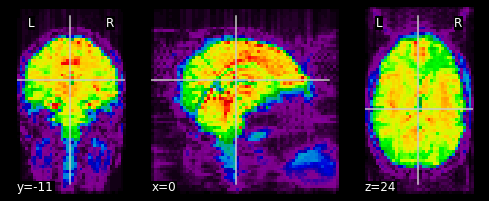

In [7]:
from nilearn.image.image import mean_img

# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = haxby_dataset.func[0]
mean_haxby = mean_img(func_filename)

from nilearn.plotting import plot_epi, show
plot_epi(mean_haxby)

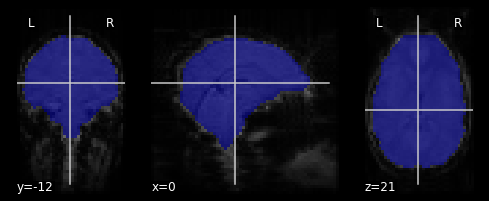

In [8]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(func_filename)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_haxby)

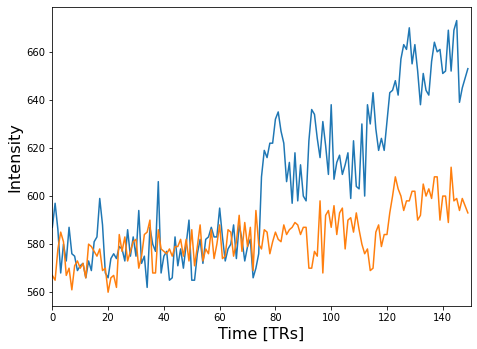

In [9]:
from nilearn.masking import apply_mask
masked_data = apply_mask(func_filename, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels

# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :2])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

### Atlas = création de plusieurs petit masques?

In [10]:
### 9.2.10

from nilearn import datasets

adhd_dataset = datasets.fetch_adhd(n_subjects=1)

# Print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      adhd_dataset.func[0])  # 4D data


Dataset created in /home/pierre/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/func.py:250: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


Downloaded 36339712 of 44414948 bytes (81.8%,    0.7s remaining) ...done. (4 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/adhd/e7ff5670bd594dcd9453e57b55d69dc9/adhd40_0010042.tgz...

First subject functional nifti image (4D) is at: /home/pierre/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


.. done.


In [11]:
from nilearn import masking

# Build an EPI-based mask because we have no anatomical data
mask_img = masking.compute_epi_mask(adhd_dataset.func[0])

/tmp/ipykernel_16338/1353763623.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


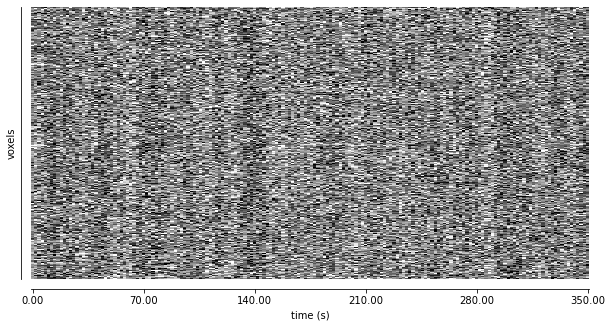

In [12]:
import matplotlib.pyplot as plt

from nilearn.plotting import plot_carpet

display = plot_carpet(adhd_dataset.func[0], mask_img)

display.show()

In [13]:
import nibabel as nib
import numpy as np
from nilearn import image

atlas = datasets.fetch_icbm152_2009()
atlas_img = image.concat_imgs((atlas["gm"], atlas["wm"], atlas["csf"]))
map_labels = {"Gray Matter": 1, "White Matter": 2, "Cerebrospinal Fluid": 3}

atlas_data = atlas_img.get_fdata()
discrete_version = np.argmax(atlas_data, axis=3) + 1
discrete_version[np.max(atlas_data, axis=3) == 0] = 0
discrete_atlas_img = nib.Nifti1Image(
    discrete_version,
    atlas_img.affine,
    atlas_img.header,
)


Dataset created in /home/pierre/nilearn_data/icbm152_2009



Downloaded 61325312 of 63027871 bytes (97.3%,    0.1s remaining) ...done. (6 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/icbm152_2009/e05b733c275cab0eec856067143c9dc9/download..... done.


/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Coercing atlas_values to <class 'int'>


/tmp/ipykernel_16338/3231175385.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


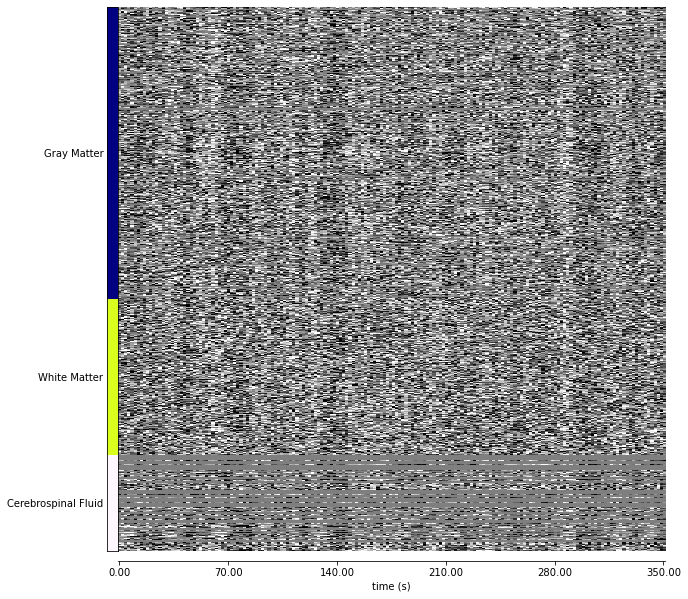

In [14]:
import matplotlib.pyplot as plt

from nilearn.plotting import plot_carpet

fig, ax = plt.subplots(figsize=(10, 10))

display = plot_carpet(
    adhd_dataset.func[0],
    discrete_atlas_img,
    mask_labels=map_labels,
    axes=ax,
)

fig.show()